epoch      error
   1 	 0.500000
   2 	 0.500000
   3 	 0.000000
   4 	 0.000000
   5 	 0.000000
   6 	 0.000000
   7 	 0.000000
   8 	 0.000000
   9 	 0.000000
  10 	 0.000000

train result
Weights after 10 iterations:

[ 1.15  0.5  -0.8   0.  ]

input
[[0.8 0.5 0. ]
 [0.9 0.7 0.3]
 [1.  0.8 0.5]
 [0.  0.2 0.3]
 [0.2 0.1 1.3]
 [0.2 0.7 0.8]]

output
[1 1 1 0 0 0]

error
[0 0 0 0 0 0]


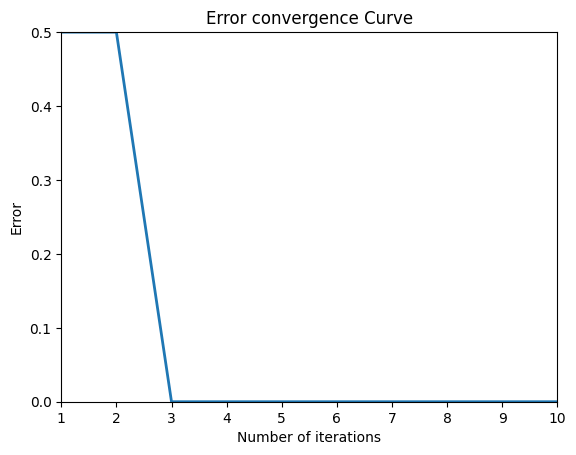

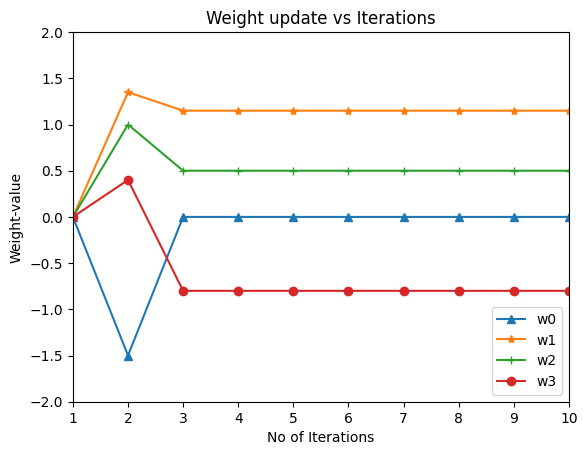

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
init_weight_scale = 0.001
C = 1

# Input data (transposed from MATLAB version for easier handling)
x = np.array([[0.8, 0.9, 1.0, 0.0, 0.2, 0.2],
              [0.5, 0.7, 0.8, 0.2, 0.1, 0.7],
              [0.0, 0.3, 0.5, 0.3, 1.3, 0.8],
              [-1, -1, -1, -1, -1, -1]])

# Desired output
da = np.array([1, 1, 1, 0, 0, 0])

# Initialize weights (zeros as in the MATLAB code)
W = np.zeros(4)
WW = [W.copy()]  # To store weight history

niter = 10
nSample = x.shape[1]
error_history = []

print('epoch      error')

# Function to apply the sign function
def signh(h):
    return np.where(h > 0, 1, 0)

for i in range(niter):
    # Forward pass
    h = W @ x  # Matrix multiplication
    y = signh(h) # sign function
    e = da - y # Error calculation
    
    # Backward pass
    f_d = 0.5 * C * e 
    delta = f_d @ x.T
    W = W + delta  # update weights
    WW.append(W.copy())  # save weights for this iteration for plotting later
    
    # Calculate and display error
    error = np.sum(e**2) / nSample # Error metric (SSE / nSample)
    error_history.append(error) 
    
    if (i+1) % 1 == 0:
        print(f'{i+1:4d} \t {error:.6f}')

# Convert weight history to numpy array
WW = np.array(WW)

# Display final results
print('\ntrain result')
print("Weights after 10 iterations:\n")
print(W)
print('\ninput')
print(x[:3].T)  # Showing just the features (without bias)

print('\noutput')
print(y)
print('\nerror')
print(e)

# Plot 1: Error convergence
plt.figure(1)
plt.plot(range(1, niter+1), error_history, linewidth=2)
plt.xlim(1, niter)
plt.ylim(0, 0.5)
plt.title('Error convergence Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

# Plot 2: Weight updates
plt.figure(3)
iterations = range(1, niter+2)  # +2 because we stored initial weights
plt.plot(iterations, WW[:, 3], '-^', label='w0')
plt.plot(iterations, WW[:, 0], '-*', label='w1')
plt.plot(iterations, WW[:, 1], '-+', label='w2')
plt.plot(iterations, WW[:, 2], '-o', label='w3')
plt.xlim(1, niter)
plt.ylim(-2, 2)
plt.xlabel('No of Iterations')
plt.ylabel('Weight-value')
plt.title('Weight update vs Iterations')
plt.legend()

plt.show()
